# Uma Perspectiva Temporal da Dinâmica Econômica entre Salário Mínimo e Preço do Gás Liquefeito de Petróleo (GLP) 

A análise do poder de compra é uma ferramenta essencial para compreender a dinâmica econômica que afeta diretamente a vida dos cidadãos. Este projeto propõe uma análise comparativa entre o salário mínimo vigente no Brasil e o preço do Gás Liquefeito de Petróleo (GLP). Ao explorar essa relação, buscamos oferecer insights valiosos sobre a acessibilidade e o impacto econômico dessas variáveis nos lares brasileiros ao longo do tempo.

## Objetivo e Intenção do Projeto

O objetivo principal deste estudo é avaliar como a evolução do salário mínimo se relaciona com as variações no preço do GLP. A intenção é identificar tendências históricas, analisar a capacidade de compra dos trabalhadores e compreender como as flutuações no preço do GLP influenciam o poder aquisitivo da população. Esta análise visa fornecer uma base sólida para futuras discussões e políticas públicas relacionadas ao custo de vida e aos salários no Brasil.

## Gás Liquefeito de Petróleo (GLP)

Com o objetivo de proporcionar à sociedade um entendimento abrangente dos preços e das margens praticadas pelos agentes econômicos em todos os segmentos do mercado de Gás Liquefeito de Petróleo (GLP) e em cumprimento às determinações da Lei do Petróleo (Lei nº 9478/1997, artigo 8º), a [Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP)](https://www.gov.br/anp) acompanha os preços praticados pelos revendedores de gás liquefeito de petróleo envasilhado em botijões de 13 quilos (GLP P13). Esse monitoramento é realizado por meio de uma pesquisa semanal de preços iniciada em 2004, que consulta as revendedoras autorizadas para coletar os preços do GLP em todas as regiões do Brasil.

Esta série histórica de preços será utilizada em nosso estudo para analisar as tendências e variações do custo do GLP ao longo do tempo, permitindo uma avaliação detalhada de como esses preços influenciam o poder de compra dos trabalhadores em relação ao salário mínimo nacional.

Para o download dos dados desta série histórica, foi criado o script presente no arquivo [data_requester.py], que realiza automaticamente o download dos arquivos CSV da Série Histórica de Preços de Combustíveis.

## Análise exploratória da Série Histórica de Preços do Gás Liquefeito de Petróleo (GLP)

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Defining the constants.
DATA_DIR = 'data/'

# Set random seed for reproducibility.
SEED = 42

In [3]:
# Set the style of the notebook.
%matplotlib inline

# Set the style of the plots.
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
# Reading the data
glp_df = pd.read_parquet(DATA_DIR + 'glp_anp_2004-2024.parquet')
glp_df.sample(5, random_state=SEED)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
4700735,SE,RJ,RESENDE,ABMGAZ COMÉRCIO DE GLP LTDA. ME.,10.197.584/0001-90,RUA INACIO LOPES SIQUEIRA,575,LOTE 2 QD. E,ALEGRIA,27524-000,GLP,2017-05-04,50,"37,64",R$ / 13 kg,BRANCA
5106349,S,PR,CAMBE,JAGUAR COMERCIO DE GAS LTDA,06.979.473/0001-69,AVENIDA GABRIEL FRECEIRO DE MIRANDA,271,None,PQ RES. MANELLA,86181-300,GLP,2019-04-01,75,None,R$ / 13 kg,NACIONAL GÁS BUTANO
2540466,CO,MT,VARZEA GRANDE,J. CARLOS DE OLIVEIRA DIST. DE GAS,04.605.090/0001-03,"RUA 20, QUADRA 3, N. 4",S/N,None,JD. VITORIA,78132-000,GLP,2011-07-11,44,None,R$ / 13 kg,BRANCA
3797022,SE,RJ,ARARUAMA,ALAHYSIO PEREIRA DE OLIVEIRA CIA LTDA,28.526.101/0001-10,AV. NILO PEÇANHA,1110,None,CENTRO,28970-000,GLP,2014-01-02,42,None,R$ / 13 kg,BRANCA
1501609,S,PR,GUARAPUAVA,DISTRIBUIDORA DUBENA LTDA.,04.190.715/0001-05,RODOVIA PR-466,1277,None,INDUSTRIAL,85050-290,GLP,2008-10-01,32,"24,5",R$ / 13 kg,BRANCA


In [5]:
# Rename the columns for better understanding.
glp_df.columns = ['Regiao', 'Estado', 'Municipio', 'Revenda', 'CNPJ_Revenda', 'Rua',
                  'Numero', 'Complemento', 'Bairro', 'Cep', 'Produto', 'Data_Coleta',
                  'Valor_Venda', 'Valor_Compra', 'Unidade_Medida', 'Bandeira']

In [6]:
# Mapping the regions to the dataset.
regioes_brasil = {'SE': 'Sudeste',
                  'NE': 'Nordeste',
                  'N': 'Norte',
                  'S': 'Sul',
                  'CO': 'Centro-Oeste'
                  }

glp_df['Regiao'] = glp_df['Regiao'].map(regioes_brasil)

In [7]:
# Dataframe dimensions.
glp_df.shape

(6102174, 16)

In [8]:
# Dataframe information.
glp_df.dtypes

Regiao            object
Estado            object
Municipio         object
Revenda           object
CNPJ_Revenda      object
Rua               object
Numero            object
Complemento       object
Bairro            object
Cep               object
Produto           object
Data_Coleta       object
Valor_Venda       object
Valor_Compra      object
Unidade_Medida    object
Bandeira          object
dtype: object

In [9]:
# Change the data type of the 'Data_Coleta' column to datetime.
glp_df['Data_Coleta'] = pd.to_datetime(glp_df['Data_Coleta'])

# Change the data type of the 'Valor_Venda' columns to float.
glp_df['Valor_Venda'] = glp_df['Valor_Venda'].str.replace(',', '.').astype(float)

# Change the data type of the 'Regiao', 'Estado', 'Municipio' and 'Bandeira' column to category.
glp_df['Bandeira'] = glp_df['Bandeira'].astype('category')

In [10]:
# Check for duplicates information.
glp_df.duplicated().sum()

0

In [11]:
# Check empty or missing values.
(glp_df.isna().sum() / glp_df.shape[0]) * 100

Regiao             0.000000
Estado             0.000000
Municipio          0.000000
Revenda            0.000000
CNPJ_Revenda       0.000000
Rua                0.000000
Numero             0.004539
Complemento       80.243910
Bairro             0.017207
Cep                0.000000
Produto            0.000000
Data_Coleta        0.000000
Valor_Venda        0.000000
Valor_Compra      71.540864
Unidade_Medida     0.000000
Bandeira           0.000000
dtype: float64

In [12]:
# Check the unique values of the 'Unidade_Medida' column.
glp_df['Unidade_Medida'].unique()

array(['R$ / 13 kg'], dtype=object)

In [13]:
glp_df.sample(10, random_state=SEED)

,Regiao,Estado,Municipio,Revenda,CNPJ_Revenda,Rua,Numero,Complemento,Bairro,Cep,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida,Bandeira
4700735,Sudeste,RJ,RESENDE,ABMGAZ COMÉRCIO DE GLP LTDA. ME.,10.197.584/0001-90,RUA INACIO LOPES SIQUEIRA,575,LOTE 2 QD. E,ALEGRIA,27524-000,GLP,2017-05-04,50.0,"37,64",R$ / 13 kg,BRANCA
5106349,Sul,PR,CAMBE,JAGUAR COMERCIO DE GAS LTDA,06.979.473/0001-69,AVENIDA GABRIEL FRECEIRO DE MIRANDA,271,None,PQ RES. MANELLA,86181-300,GLP,2019-04-01,75.0,None,R$ / 13 kg,NACIONAL GÁS BUTANO
2540466,Centro-Oeste,MT,VARZEA GRANDE,J. CARLOS DE OLIVEIRA DIST. DE GAS,04.605.090/0001-03,"RUA 20, QUADRA 3, N. 4",S/N,None,JD. VITORIA,78132-000,GLP,2011-07-11,44.0,None,R$ / 13 kg,BRANCA
3797022,Sudeste,RJ,ARARUAMA,ALAHYSIO PEREIRA DE OLIVEIRA CIA LTDA,28.526.101/0001-10,AV. NILO PEÇANHA,1110,None,CENTRO,28970-000,GLP,2014-01-02,42.0,None,R$ / 13 kg,BRANCA
1501609,Sul,PR,GUARAPUAVA,DISTRIBUIDORA DUBENA LTDA.,04.190.715/0001-05,RODOVIA PR-466,1277,None,INDUSTRIAL,85050-290,GLP,2008-10-01,32.0,"24,5",R$ / 13 kg,BRANCA
5509706,Centro-Oeste,GO,APARECIDA DE GOIANIA,HECKMANN E BOVE LTDA.,06.948.636/0001-46,AVENIDA DAS MANGUEIRAS,SN,QUADRA 46 LOTES 8/9,VILA ALZIRA,74913-360,GLP,2021-12-01,105.0,None,R$ / 13 kg,SUPERGASBRAS ENERGIA
829502,Sul,PR,MARINGA,CELIA GAMA REIS ME,76.394.683/0001-70,AV. PAISSANDU 1161,S/N,None,VILA OPERARIA,87050-210,GLP,2006-05-18,32.0,None,R$ / 13 kg,BRANCA
1414337,Sudeste,SP,LIMEIRA,COMERCIO DE GAS LIMEIRA LTDA,01.183.387/0001-21,RUA JOAO CIARROCHI,459,None,JD. OLGA VERONI,13487-136,GLP,2008-07-16,33.0,"31,61",R$ / 13 kg,BRANCA
789980,Sudeste,SP,ITAPETININGA,RM DE ANDRADE - ME,05.518.397/0001-21,AV DR. JOSE LEMBO,782,None,JD BELA VISTA,18207-780,GLP,2006-04-11,29.0,None,R$ / 13 kg,BRANCA
1401820,Sul,RS,CANOAS,GILBERTO ADRIANO FREITAS DA ROSA,07.386.507/0001-74,RUA PAULO FONTELES,269,None,NITEROI,92130-180,GLP,2008-07-02,38.0,"35,55",R$ / 13 kg,BRANCA


In [14]:
# Select only the relevant columns.
glp_relevant_columns = ['Regiao', 'Estado', 'Municipio', 'Data_Coleta', 'Valor_Venda', 'Bandeira']
# Drop the irrelevant columns.
glp_df = glp_df[glp_relevant_columns]

In [15]:
# Create a new column with the year of the 'Data_Coleta' column.
glp_df['Ano'] = glp_df['Data_Coleta'].dt.year

# Create a new column with the month of the 'Data_Coleta' column.
glp_df['Mes'] = glp_df['Data_Coleta'].dt.month

In [16]:
# Mean price of the LPG in 2024 by region and state.
glp_df.groupby(['Ano', 'Regiao', 'Estado'])['Valor_Venda'].mean()[2024]

Regiao        Estado
Centro-Oeste  DF         95.218328
              GO        101.892389
              MS        109.819065
              MT        116.644884
Nordeste      AL         93.903205
              BA        108.297633
              CE        100.212935
              MA        105.236500
              PB        101.564242
              PE         90.481538
              PI         97.386048
              RN        103.807147
              SE         97.251743
Norte         AC        116.179904
              AM        123.426807
              AP        111.605442
              PA        108.153950
              RO        120.082367
              RR        128.144443
              TO        119.426507
Sudeste       ES         96.300755
              MG         99.625721
              RJ         93.053943
              SP         99.756885
Sul           PR         98.573519
              RS        105.872654
              SC        113.542222
Name: Valor_Venda, dtype: float64

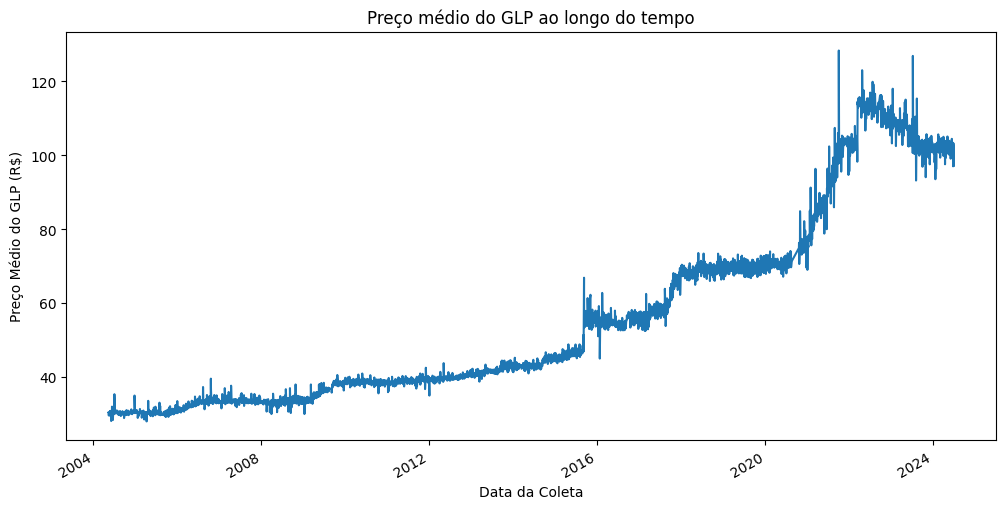

In [17]:
glp_df.groupby('Data_Coleta')['Valor_Venda'].mean().plot(kind='line',
                                                         figsize=(12, 6),
                                                         title='Preço médio do GLP ao longo do tempo',
                                                         xlabel='Data da Coleta',
                                                         ylabel='Preço Médio do GLP (R$)');

## Salário Mínimo

O salário mínimo urbano no Brasil foi instituído por decreto-lei do presidente Getúlio Vargas durante a ditadura do Estado Novo, entrando em vigor em julho de 1940, com valores diferenciados entre estados e sub-regiões. Em 1943, foi incorporado à Consolidação das Leis do Trabalho (CLT) e, em 1963, sua aplicação foi estendida aos trabalhadores rurais por meio do Estatuto do Trabalhador Rural. Em maio de 1984, o salário mínimo foi unificado nacionalmente. Contudo, desde 2000, a Lei Complementar nº 103 permite que os estados fixem pisos estaduais superiores ao mínimo nacional.

A série histórica utilizada em nossa análise refere-se ao maior salário mínimo vigente no país, disponibilizada pelo [Ipeadata](http://www.ipeadata.gov.br/Default.aspx) na série "Salário mínimo vigente (MTE12_SALMIN12)".

In [18]:
# Ipeadata MTE12_SALMIN12 URL.
ipeadata_url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=1739471028&module=M'

In [19]:
# Importing and selecting the relevant data from the IPEADATA website.
salmin_df = pd.read_html(ipeadata_url)[2]

# Drop the irrelevant line.
salmin_df = salmin_df.iloc[1:]
salmin_df.columns = ['Data', 'Salario_Minimo']

In [20]:
# Convert the 'Data' column to datetime.
salmin_df['Data'] = pd.to_datetime(salmin_df['Data'], format='mixed')

# Select only the data from 2004.
salmin_df = salmin_df.query('Data >= "2004-01-01"')

In [21]:
# When importing the data, pandas removed the comma from the decimal places.
mask = salmin_df['Data'] <= '2019-12-01'
salmin_df['Salario_Minimo'] = np.where(mask,
                                       salmin_df['Salario_Minimo'].str[:-2],
                                       salmin_df['Salario_Minimo'])

In [22]:
# Replace the comma with a dot and convert the column to float.
salmin_df['Salario_Minimo'] = salmin_df['Salario_Minimo']\
    .str.replace('.', '')\
    .str.replace(',', '.')\
    .astype(float)

In [23]:
salmin_df.sample(10, random_state=SEED)

,Data,Salario_Minimo
928,2017-10-01,937.0
769,2004-07-01,260.0
874,2013-04-01,678.0
935,2018-05-01,954.0
878,2013-08-01,678.0
946,2019-04-01,998.0
962,2020-08-01,1045.0
998,2023-08-01,1320.0
772,2004-10-01,260.0
793,2006-07-01,350.0


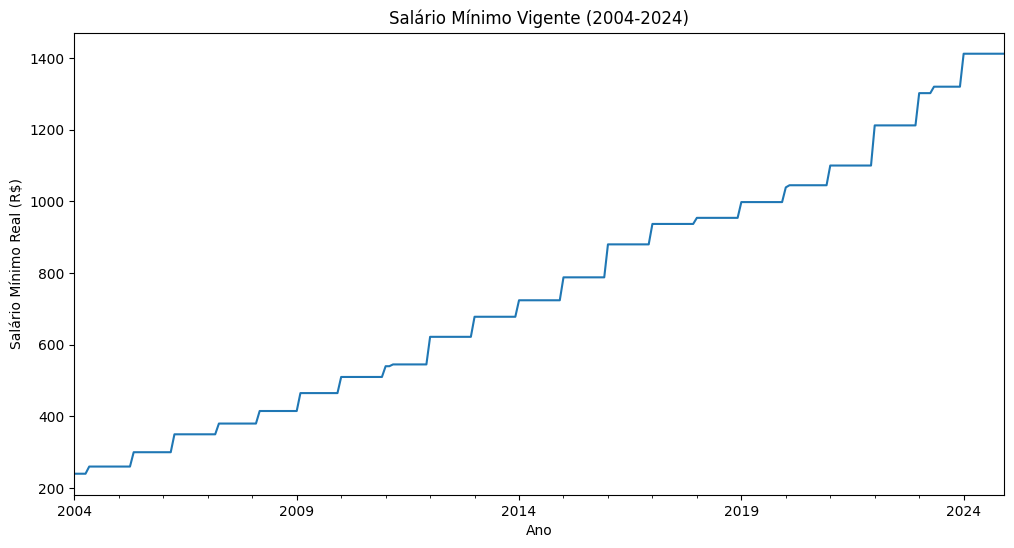

In [24]:
salmin_df.plot(x='Data',
               y='Salario_Minimo',
               kind='line',
               figsize=(12, 6),
               title='Salário Mínimo Vigente (2004-2024)',
               xlabel='Ano',
               ylabel='Salário Mínimo Real (R$)',
               legend=False);

O gráfico do salário mínimo real no Brasil, de 2004 a 2024, destaca um aumento consistente, com incrementos anuais regulares. Em 2004, o salário mínimo era de cerca de R$ 240, finalizando em R$ 1422 em 2024. O padrão em "degraus" sugere ajustes planejados para manter o poder de compra frente à inflação e melhorar a renda dos trabalhadores. A partir de 2019, observa-se uma aceleração nos aumentos, refletindo políticas econômicas focadas na valorização do salário mínimo, especialmente em resposta aos desafios trazidos pela pandemia de COVID-19.

## Comparando as séries temporais

No processo de análise, realizamos a reamostragem dos dados da série temporal para uma frequência mensal. Essa transformação permitiu uma visualização mais clara das tendências ao longo do tempo, facilitando a identificação de padrões e flutuações no salário mínimo real. A escolha da reamostragem mensal foi feita para garantir que as análises refletissem com precisão as variações ao longo dos anos, proporcionando insights mais detalhados e consistentes.

In [25]:
# Resample the data to monthly frequency and calculate the mean.
glp_monthly_df = glp_df[['Data_Coleta', 'Valor_Venda']].resample('M', on='Data_Coleta').mean()

In [26]:
# Check for missing values.
glp_monthly_df.loc[glp_monthly_df['Valor_Venda'].isna()]

,Valor_Venda
Data_Coleta,
2020-09-30,NaN


In [27]:
# Seach for data in 09/2024 in the original dataframe.
glp_df.query('Data_Coleta.dt.year == 2020 and Data_Coleta.dt.month == 9')

,Regiao,Estado,Municipio,Data_Coleta,Valor_Venda,Bandeira,Ano,Mes


In [28]:
# Fill the missing value with the mean of the previous and next month.
glp_monthly_df['Valor_Venda'].ffill(inplace=True)
glp_monthly_df.loc[glp_monthly_df['Valor_Venda'].isna()]

,Valor_Venda
Data_Coleta,


In [29]:
# Group data by 'Regiao', 'Estado' and 'Data_Coleta'
# columns and calculate the mean of the 'Valor_Venda' column.
glp_grouped_df = glp_df.groupby(['Regiao', 'Estado', 'Ano'])['Valor_Venda'].mean().reset_index()

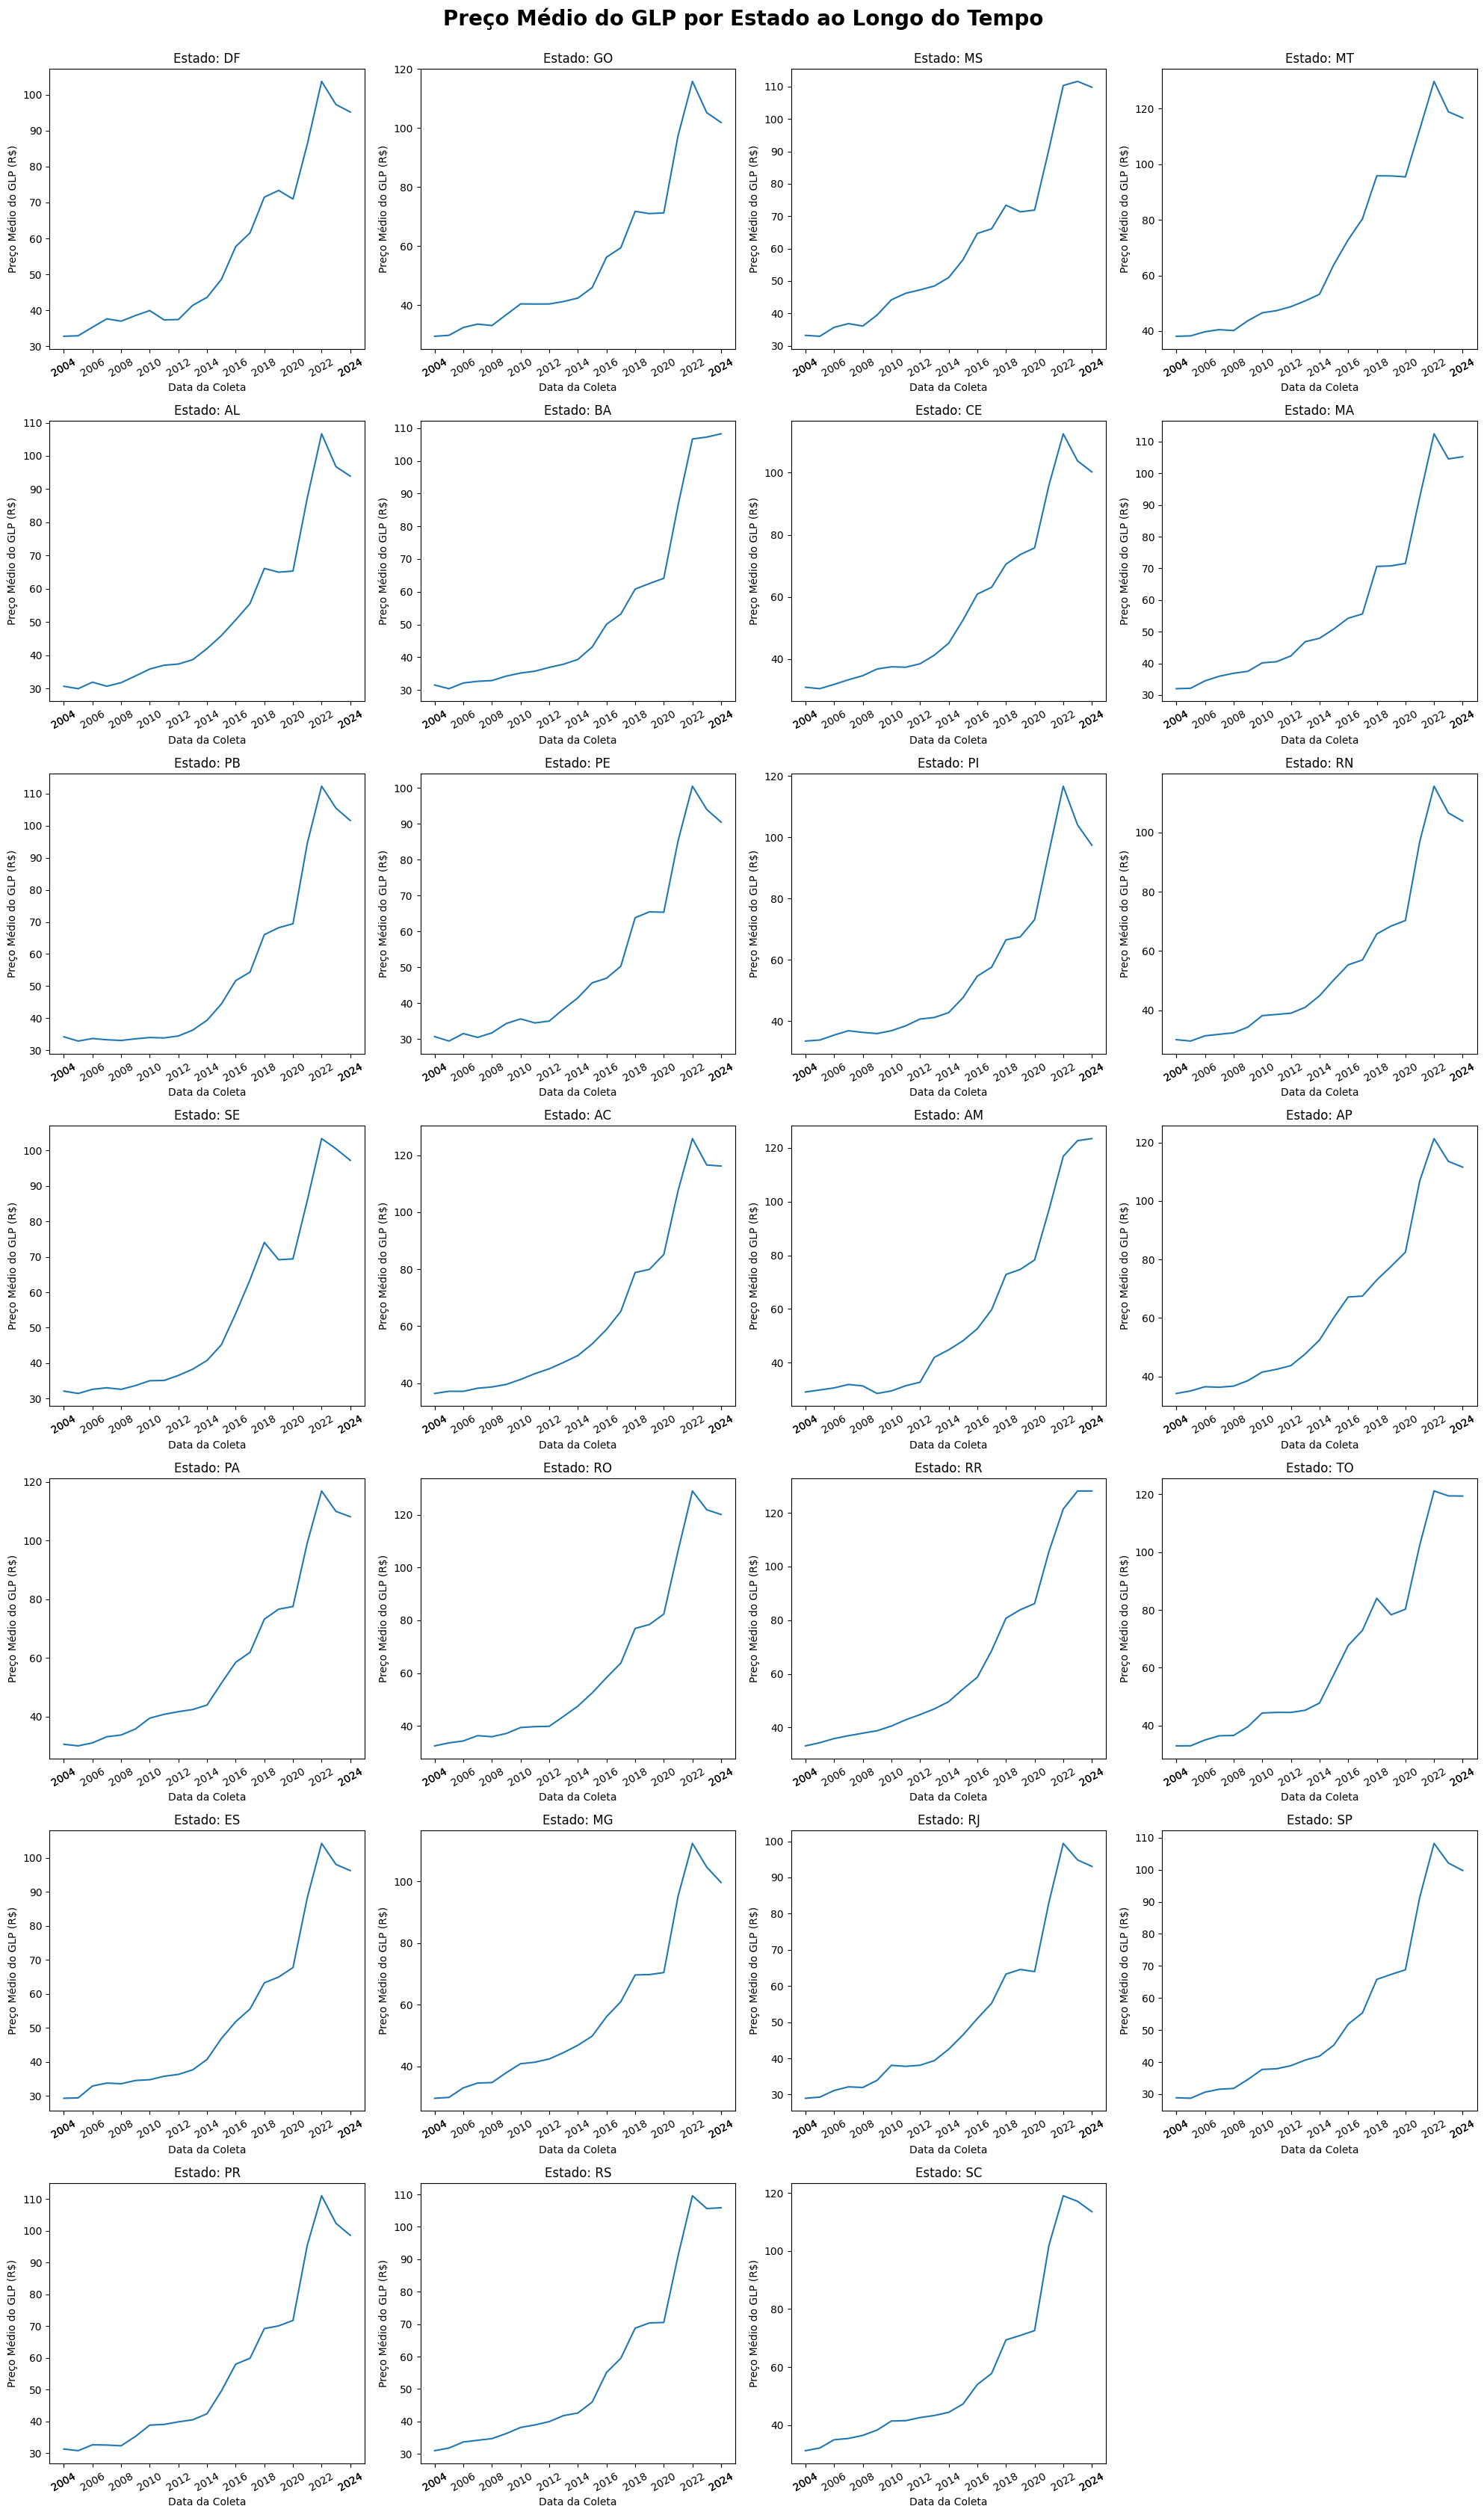

In [30]:
# Get the unique states.
unique_states = glp_grouped_df['Estado'].unique()

# Define the number of rows and columns for the subplots.
num_columns = 4
num_rows = len(unique_states) // num_columns + (len(unique_states) % num_columns > 0)

# Create the grid of subplots.
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration.
axes = axes.flatten()

# Plot each state's data.
for i, state in enumerate(unique_states):
    state_data_df = glp_grouped_df[glp_grouped_df['Estado'] == state]
    axes[i].plot(state_data_df['Ano'], state_data_df['Valor_Venda'])
    axes[i].set_title(f'Estado: {state}')
    axes[i].set_xlabel('Data da Coleta')
    axes[i].set_ylabel('Preço Médio do GLP (R$)')

    # Set the x-axis ticks to be the years.
    years = anos = state_data_df['Ano'].unique()
    # Display only the first and last year and the even years in between.
    displayed_years = [years[0]] + list(anos[anos % 2 == 0]) + [years[-1]]
    axes[i].set_xticks(displayed_years)
    axes[i].set_xticklabels(displayed_years, rotation=30)

# Remove any empty subplots
for empty in range(i + 1, len(axes)):
    fig.delaxes(axes[empty])

# Add a general title to the grid of plots.
fig.suptitle('Preço Médio do GLP por Estado ao Longo do Tempo',
             fontsize=20,
             y=0.96,
             fontweight='bold')

# Adjust layout.
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A análise dos gráficos de preços médios do GLP por estado mostra um aumento significativo em todo o Brasil, especialmente a partir de 2021. Esse crescimento pode ser atribuído a fatores econômicos como inflação e custos de produção elevados. Embora a tendência de alta seja comum a todos os estados, a intensidade varia, refletindo diferenças regionais em infraestrutura, impostos e demanda. Essa variação sugere a necessidade de abordagens políticas específicas para mitigar impactos econômicos nos consumidores de cada região. Os picos acentuados nos anos recentes destacam a influência de eventos econômicos e regulatórios no mercado.

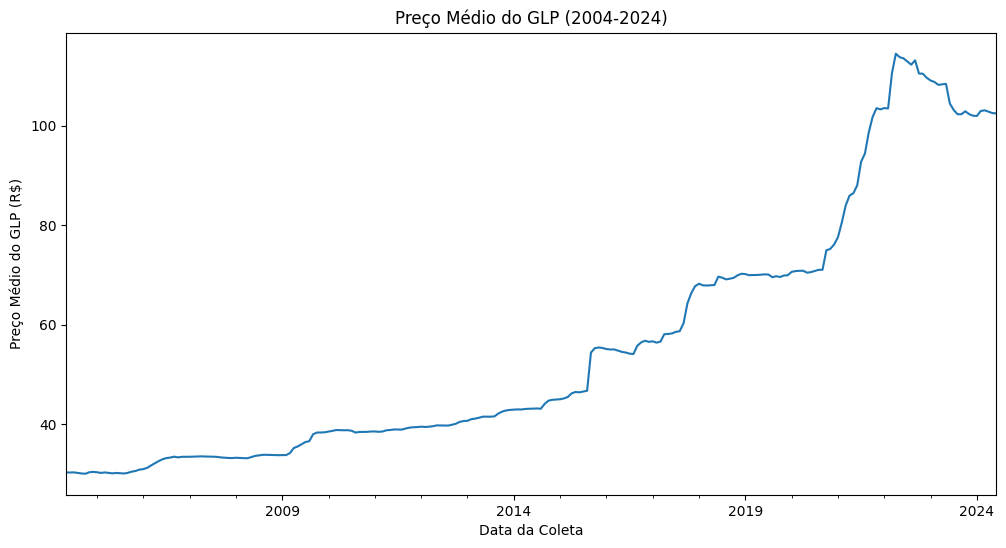

In [31]:
glp_monthly_df.plot(y='Valor_Venda',
                    kind='line',
                    figsize=(12, 6),
                    title='Preço Médio do GLP (2004-2024)',
                    xlabel='Data da Coleta',
                    ylabel='Preço Médio do GLP (R$)',
                    legend=False);

A análise da série histórica do preço do GLP revela uma tendência de aumento gradual até 2014. A partir de 2015, os preços começam a subir mais rapidamente, com dois momentos significativos de aceleração antes dos efeitos da pandemia de COVID-19. Em 2023, o preço atinge seu pico, seguido por uma leve estabilização. Essa trajetória reflete o impacto de variáveis macroeconômicas, como inflação e políticas energéticas, sobre o mercado de GLP, afetando diretamente o custo de vida e a economia doméstica.

In [32]:
# Trasnformar os dados o index em coluna.
glp_monthly_df.reset_index(inplace=True)
glp_monthly_df

,Data_Coleta,Valor_Venda
0,2004-05-31,30.333714
1,2004-06-30,30.298823
2,2004-07-31,30.330043
3,2004-08-31,30.224504
4,2004-09-30,30.106575
...,...,...
237,2024-02-29,102.968836
238,2024-03-31,103.103893
239,2024-04-30,102.840850
240,2024-05-31,102.550817


In [33]:
salmin_df['Data'] = salmin_df['Data'] + pd.offsets.MonthEnd(0)

In [34]:
# Merge the dataframes salmin_df and glp_monthly_df on the 'Data' column.
monthly_info_df = pd.merge(salmin_df, glp_monthly_df, left_on='Data', right_on='Data_Coleta', how='inner')

# Drop the 'Data_Coleta' column.
monthly_info_df.drop('Data_Coleta', axis=1, inplace=True)
monthly_info_df.sample(10, random_state=SEED)

,Data,Salario_Minimo,Valor_Venda
24,2006-05-31,350.0,32.602174
6,2004-11-30,260.0,30.353700
152,2017-01-31,937.0,56.671189
209,2021-10-31,1100.0,101.806548
237,2024-02-29,1412.0,102.968836
199,2020-12-31,1045.0,76.121099
190,2020-03-31,1045.0,70.843771
150,2016-11-30,880.0,56.787994
9,2005-02-28,260.0,30.220890
113,2013-10-31,678.0,42.550444


### Análise do Poder de Compra do Salário Mínimo em Relação ao Gás Liquefeito de Petróleo (GLP)

Nesta seção, o foco é analisar a evolução do poder de compra de um salário mínimo em relação à quantidade de botijões de Gás Liquefeito de Petróleo (GLP) que podem ser adquiridos ao longo do tempo. Esse estudo visa compreender como as mudanças no salário mínimo e o comportamento dos preços do GLP impactam a capacidade de consumo dos trabalhadores.

A análise se concentrará em determinar quantos botijões de 13 quilos (GLP P13) podem ser comprados com o valor de um salário mínimo em diferentes períodos. Tal abordagem permite uma avaliação concreta de como as flutuações econômicas e as políticas salariais afetam o orçamento doméstico e a acessibilidade a bens essenciais de energia.

Ao comparar a quantidade de botijões acessíveis com o salário mínimo em várias décadas, podemos identificar tendências de melhora ou deterioração do poder de compra, fornecendo um panorama histórico e econômico crucial para entender as condições de vida dos trabalhadores ao longo do tempo. Esta análise também busca evidenciar possíveis descompassos entre o reajuste salarial e a inflação nos preços do GLP, contribuindo para discussões sobre políticas públicas e ajustes necessários.

In [35]:
monthly_info_df['Qtd_Botijoes'] = monthly_info_df['Salario_Minimo'] / monthly_info_df['Valor_Venda']
monthly_info_df['Qtd_Botijoes'] = monthly_info_df['Qtd_Botijoes'].round(2)

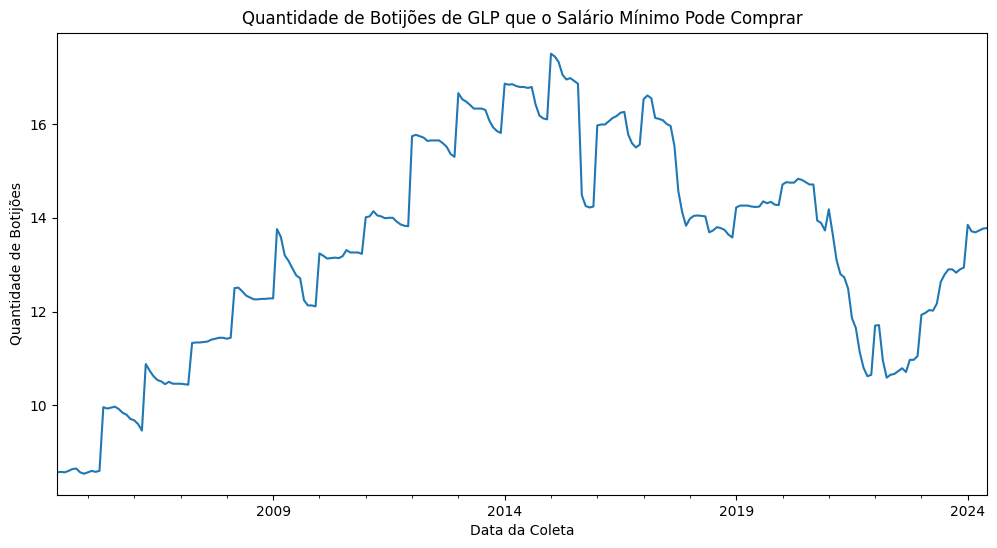

In [36]:
monthly_info_df.plot(x='Data',
                        y='Qtd_Botijoes',
                        kind='line',
                        figsize=(12, 6),
                        title='Quantidade de Botijões de GLP que o Salário Mínimo Pode Comprar',
                        xlabel='Data da Coleta',
                        ylabel='Quantidade de Botijões',
                        legend=False);

O gráfico ilustra a quantidade de botijões de GLP que o salário mínimo pode comprar entre 2004 e 2024. Até 2014, há uma tendência de aumento, indicando que o poder de compra do salário mínimo em relação ao GLP estava se fortalecendo. Após 2014, observa-se uma queda acentuada, especialmente entre 2019 e 2021, possivelmente devido ao impacto econômico da pandemia de COVID-19. A partir de 2021, nota-se uma recuperação gradual, sugerindo uma estabilização nos preços do GLP ou ajustes no salário mínimo.

In [37]:
annual_info_df = monthly_info_df.resample('Y', on='Data').mean().reset_index()
annual_info_df.columns = ['Ano', 'Salario_Medio', 'Valor_Medio', 'Qtd_Botijoes']
annual_info_df

,Ano,Salario_Medio,Valor_Medio,Qtd_Botijoes
0,2004-12-31,260.000000,30.266637,8.590000
1,2005-12-31,286.666667,30.327634,9.452500
2,2006-12-31,337.500000,32.662481,10.325000
3,2007-12-31,372.500000,33.419066,11.147500
4,2008-12-31,409.166667,33.564659,12.190000
5,2009-12-31,460.833333,36.219295,12.743333
6,2010-12-31,510.000000,38.616975,13.207500
7,2011-12-31,544.166667,38.944707,13.973333
8,2012-12-31,622.000000,39.852121,15.609167
9,2013-12-31,678.000000,41.725453,16.253333


In [38]:
# Calculate the percentage change of the 'Valor_Medio' and 'Salario_Medio' columns.
annual_info_df['pct_reajuste_glp'] = annual_info_df['Valor_Medio'].pct_change() * 100
annual_info_df['pct_reajuste_salario'] = annual_info_df['Salario_Medio'].pct_change() * 100
annual_info_df

,Ano,Salario_Medio,Valor_Medio,Qtd_Botijoes,pct_reajuste_glp,pct_reajuste_salario
0,2004-12-31,260.000000,30.266637,8.590000,NaN,NaN
1,2005-12-31,286.666667,30.327634,9.452500,0.201531,10.256410
2,2006-12-31,337.500000,32.662481,10.325000,7.698744,17.732558
3,2007-12-31,372.500000,33.419066,11.147500,2.316374,10.370370
4,2008-12-31,409.166667,33.564659,12.190000,0.435660,9.843400
5,2009-12-31,460.833333,36.219295,12.743333,7.909022,12.627291
6,2010-12-31,510.000000,38.616975,13.207500,6.619895,10.669078
7,2011-12-31,544.166667,38.944707,13.973333,0.848674,6.699346
8,2012-12-31,622.000000,39.852121,15.609167,2.330005,14.303216
9,2013-12-31,678.000000,41.725453,16.253333,4.700709,9.003215


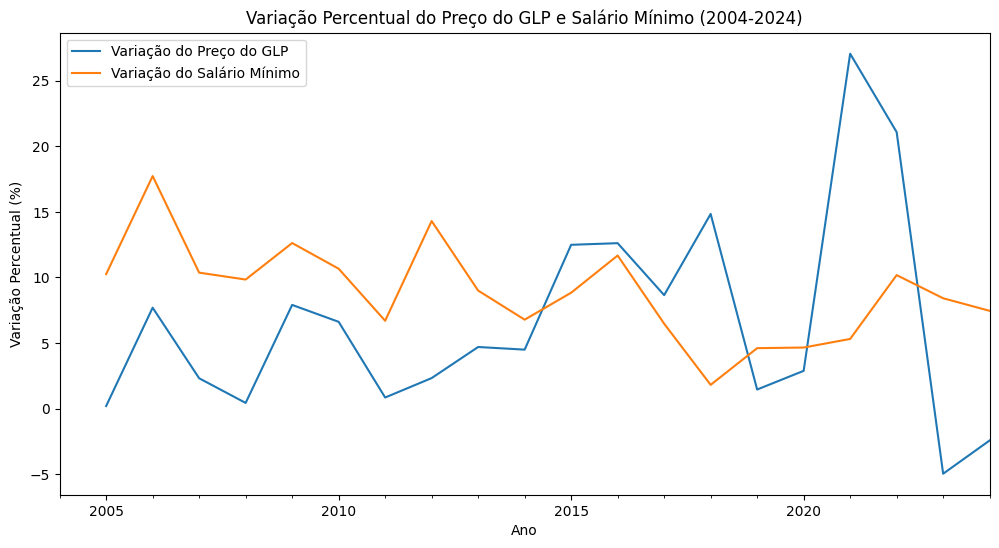

In [39]:
annual_info_df.plot(x='Ano',
                    y=['pct_reajuste_glp', 'pct_reajuste_salario'],
                    kind='line',
                    figsize=(12, 6),
                    title='Variação Percentual do Preço do GLP e Salário Mínimo (2004-2024)',
                    xlabel='Ano',
                    ylabel='Variação Percentual (%)',
                    legend=True)

plt.legend(['Variação do Preço do GLP', 'Variação do Salário Mínimo'])
plt.show()

O gráfico ilustra as variações percentuais anuais do preço do GLP e do salário mínimo no Brasil, de 2004 a 2024. Observa-se, inicialmente, que até 2010, o salário mínimo apresenta variações percentuais elevadas, frequentemente superando as do GLP. Esse comportamento sugere um fortalecimento do poder de compra do salário mínimo em relação ao GLP, uma vez que os aumentos no salário mínimo eram significativamente maiores do que os ajustes nos preços do GLP.

Entre 2010 e 2015, as variações do salário mínimo começam a diminuir, enquanto o preço do GLP exibe maior volatilidade, com algumas quedas acentuadas. Essa estabilidade relativa do salário mínimo, em contraste com as variações do GLP, pode indicar políticas de controle de preços ou ajustes econômicos que buscaram manter o poder de compra dos trabalhadores. No período de 2015 a 2020, observa-se uma convergência nas variações, com uma diminuição no ritmo de crescimento do salário mínimo e um aumento significativo no preço do GLP, especialmente próximo de 2020. A partir de 2020, há um pico acentuado na variação do preço do GLP, possivelmente devido aos impactos econômicos da pandemia de COVID-19 e crises globais de energia. Apesar disso, o salário mínimo continua a aumentar, mas em um ritmo mais moderado. Após 2021, o preço do GLP cai drasticamente, sugerindo intervenções de mercado ou ajustes de fornecimento.

De forma global, o gráfico revela uma complexa interação entre o preço do GLP e o salário mínimo, influenciada por políticas econômicas, inflação e eventos globais, destacando a importância de ajustes adequados para manter o poder de compra dos trabalhadores.